In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
import pandas as pd

df = pd.read_csv('data/val_df.csv')
df.head()

,label,text
0,0,How does this place even stay in business. It'...
1,0,"Bobby, I know Todd Pletcher talked you into bu..."
2,4,I came to visit my dad and help with an annual...
3,1,It seems like some people in North Scottsdale ...
4,3,A storybook castle gleams to bring fanciful fa...


In [16]:
from tqdm import tqdm

embeddings = []
for sentence in tqdm(df['text'], desc='Creating embeddings'):
    embedding = model.encode(sentence)
    embeddings.append(embedding)

# Assign the embeddings to a new column named 'embedding' in the sampled DataFrame
df['embedding'] = embeddings

# Print the sampled DataFrame
print(df)

Creating embeddings: 100%|██████████████████████████████████████████████████████| 130000/130000 [27:42<00:00, 78.21it/s]


        label                                               text  \
0           0  How does this place even stay in business. It'...   
1           0  Bobby, I know Todd Pletcher talked you into bu...   
2           4  I came to visit my dad and help with an annual...   
3           1  It seems like some people in North Scottsdale ...   
4           3  A storybook castle gleams to bring fanciful fa...   
...       ...                                                ...   
129995      4  This is easily my favorite cafe in all of Temp...   
129996      1  I gave this place two stars only because of my...   
129997      2  one thing this place was loud sound echos all ...   
129998      1  Was disappointed with Gorden. We expected so m...   
129999      4  Very generous on toppings always very friendly...   

                                                embedding  
0       [0.005295259, -0.068903826, -0.02118602, -0.01...  
1       [0.0025927785, -0.030249547, 0.010634893, 0.00...  
2  

In [18]:
df.to_csv('Val_EDA.csv', index=False)

Load data

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Val_EDA.csv')
embeddings = df['embedding']
labels = df['label']

In [5]:
# check df
print(df.head())
embeddings

   label                                               text  \
0      0  How does this place even stay in business. It'...   
1      0  Bobby, I know Todd Pletcher talked you into bu...   
2      4  I came to visit my dad and help with an annual...   
3      1  It seems like some people in North Scottsdale ...   
4      3  A storybook castle gleams to bring fanciful fa...   

                                           embedding  
0  [ 5.29525895e-03 -6.89038262e-02 -2.11860202e-...  
1  [ 2.59277853e-03 -3.02495472e-02  1.06348926e-...  
2  [-6.11007959e-02 -3.17642055e-02  1.94601957e-...  
3  [ 1.28230214e-01 -8.80932361e-02 -5.29523157e-...  
4  [ 4.77440096e-02  2.26514209e-02  6.53549284e-...  


0         [ 5.29525895e-03 -6.89038262e-02 -2.11860202e-...
1         [ 2.59277853e-03 -3.02495472e-02  1.06348926e-...
2         [-6.11007959e-02 -3.17642055e-02  1.94601957e-...
3         [ 1.28230214e-01 -8.80932361e-02 -5.29523157e-...
4         [ 4.77440096e-02  2.26514209e-02  6.53549284e-...
                                ...                        
129995    [ 1.38635840e-02 -1.25820469e-02 -7.04697967e-...
129996    [-1.64263265e-03 -7.26291211e-03  5.01342826e-...
129997    [ 2.05095652e-02  2.03881618e-02  8.03016219e-...
129998    [-1.57738477e-02  1.90166552e-02  1.43246744e-...
129999    [-3.22374851e-02  4.44732793e-02 -1.45408036e-...
Name: embedding, Length: 130000, dtype: object

In [28]:
import numpy as np

def convert_to_matrix(matrix_str):
    matrix_str = matrix_str.strip("'[]")
    values = matrix_str.split()
    matrix = np.array([float(val) for val in values])
    matrix = matrix.reshape((1, -1))
    return matrix

# Apply the conversion function to the 'embeddings' column
df['embedding'] = df['embedding'].apply(convert_to_matrix)


In [29]:
embeddings = df['embedding']
labels = df['label']

In [34]:
# try random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = np.vstack(embeddings)

# Convert the 'labels' series to a numpy array
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.4408846153846154


In [ ]:
# make it more complex
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

In [19]:
# try PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Perform K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_pca)


NameError: name 'df_sampled' is not defined

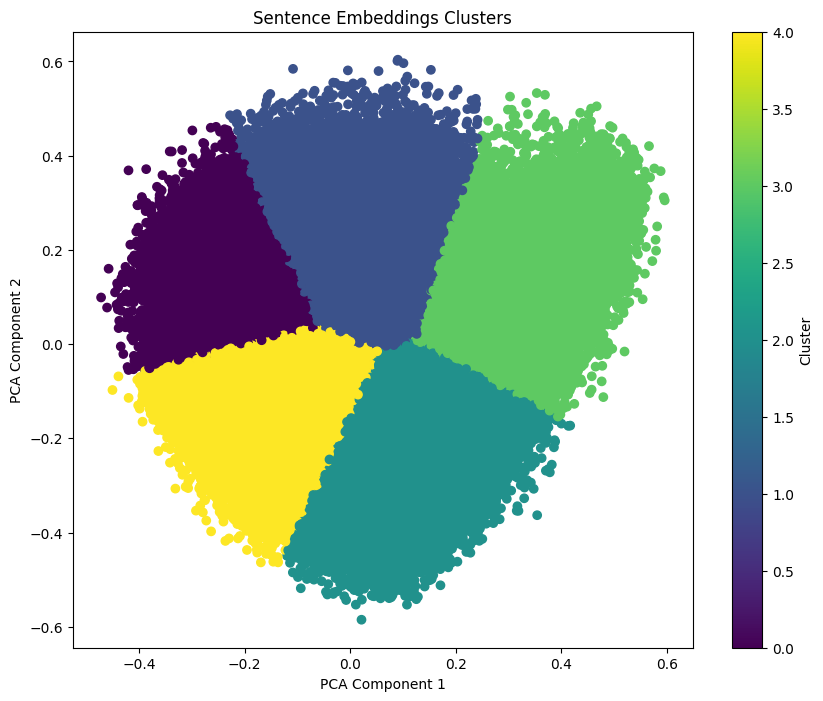

In [20]:

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Sentence Embeddings Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()